# 1.Business Problem

In [1]:
import pandas as pd
df=pd.read_csv("Fraud_check.csv")

In [2]:
df.sample(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
242,NO,Divorced,33092,84368,2,YES
184,NO,Divorced,93307,70138,15,YES
540,YES,Single,12682,110308,22,NO


In [3]:
df.shape

(600, 6)

In [4]:
df['Taxable.Income'][df['Taxable.Income'] <=30000] =True

C:\Users\raj\AppData\Local\Temp\ipykernel_24488\1255118567.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Taxable.Income'][df['Taxable.Income'] <=30000] =True
C:\Users\raj\AppData\Local\Temp\ipykernel_24488\1255118567.py:1: SettingW

In [5]:
set(df['Marital.Status'])

{'Divorced', 'Married', 'Single'}

In [6]:
set(df['Undergrad'])

{'NO', 'YES'}

In [7]:
set(df['Urban'])

{'NO', 'YES'}

In [8]:
df.sample(4)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
481,YES,Single,62998,120012,13,NO
430,YES,Married,98720,161215,8,NO
447,NO,Married,83061,166606,5,YES
81,YES,Divorced,35610,121608,24,NO


In [9]:
df['Taxable.Income'][df['Taxable.Income'] >30000] =False  

In [10]:
df.sample(4)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
241,YES,Single,True,31377,18,YES
435,NO,Divorced,False,111774,4,YES
196,YES,Married,True,28410,21,NO
55,YES,Single,True,89965,16,YES


In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [12]:
df['Taxable.Income']=df['Taxable.Income'].replace(True,'Good')

In [13]:
df.sample(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
161,YES,Married,False,185596,30,YES
225,YES,Single,False,125883,0,YES
139,YES,Divorced,False,86904,20,NO


In [14]:
df['Taxable.Income']=df['Taxable.Income'].replace(False,'Bad')

In [15]:
df.sample(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
279,YES,Single,Bad,74136,12,YES
143,YES,Single,Good,154013,11,NO
297,NO,Married,Bad,36924,15,NO
97,YES,Divorced,Bad,37849,19,YES
172,NO,Married,Good,52819,23,YES


# preprocessing

In [16]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    object
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.3+ KB


In [18]:
df['Undergrad']=lab.fit_transform(df['Undergrad'])

In [19]:
df['Urban']=lab.fit_transform(df['Urban'])

In [20]:
df['Taxable.Income']=lab.fit_transform(df['Taxable.Income'])

In [21]:
df['Marital.Status']=lab.fit_transform(df['Marital.Status'])

<Axes: xlabel='City.Population', ylabel='Work.Experience'>

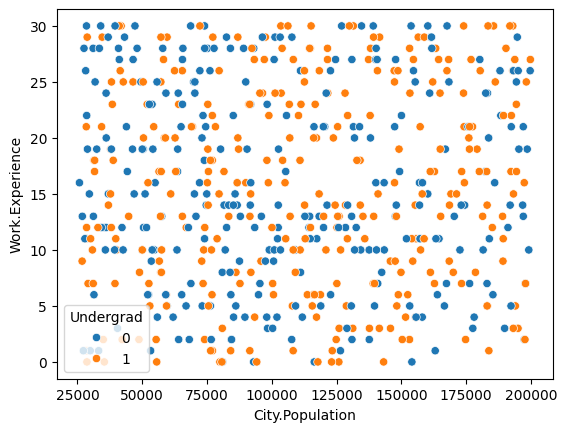

In [22]:
sns.scatterplot(df,x='City.Population',y='Work.Experience',hue='Undergrad')

In [23]:
# city population is not import in given  table  

In [24]:
df=df.drop(columns=['City.Population'])

In [25]:
df['Taxable.Income'].value_counts()

Taxable.Income
0    476
1    124
Name: count, dtype: int64

In [26]:
# imblace data 


In [27]:
X=df.iloc[:,[0,1,3,4]]
y=df['Taxable.Income'].values

In [28]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree 
from sklearn.ensemble import RandomForestClassifier 

In [30]:
clf1=DecisionTreeClassifier()
clf2=RandomForestClassifier()

In [31]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
clf2.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
from sklearn.metrics import accuracy_score 
y_pre1=clf1.predict(X_test)
y_pre2=clf2.predict(X_test)  

In [34]:
accuracy_score(y_pre1,y_test)

0.7416666666666667

In [35]:
accuracy_score(y_pre2,y_test)

0.6916666666666667

In [40]:
from sklearn.metrics import classification_report ,f1_score,recall_score,precision_score

In [38]:
print(classification_report(y_test,y_pre1))

              precision    recall  f1-score   support

           0       0.79      0.90      0.85        94
           1       0.31      0.15      0.21        26

    accuracy                           0.74       120
   macro avg       0.55      0.53      0.53       120
weighted avg       0.69      0.74      0.71       120



In [39]:
print(classification_report(y_test,y_pre2))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        94
           1       0.13      0.08      0.10        26

    accuracy                           0.69       120
   macro avg       0.45      0.47      0.46       120
weighted avg       0.63      0.69      0.66       120



In [41]:
recall_score(y_test,y_pre1)

0.15384615384615385

In [42]:
f1_score(y_test,y_pre1)

0.20512820512820512